# Continuous Probabilistic Methods

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [1]:
def upper_outliers(s, k):
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def lower_outliers(s, k):
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    return s.apply(lambda x: max([lower_bound - x, 0]))

def get_lower_and_upper_bounds(x, multiplier):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - multiplier*iqr
    upper_fence = q3 + multiplier*iqr
    lower_outliers = x[x <= lower_fence]
    upper_outliers = x[x >= upper_fence]
    return lower_outliers, upper_outliers

### 1. Using lemonade.csv dataset and focusing on continuous variables:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

df = pd.read_csv(url)

df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [4]:
def add_lower_outlier_columns(df, k):
    for col in df.select_dtypes('number'):
        df[col + '_lower_outliers'] = lower_outliers(df[col], k)
    return df

In [5]:
low_df = df.copy()
low_df = add_lower_outlier_columns(low_df, 1.5)
low_df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0,0.0,0.0,0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0,0.0,0.0,0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0,0.0,0.0,0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.0,0,0.0,0.0,0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.0,0,0.0,0.0,0


In [6]:
get_lower_and_upper_bounds(df.Temperature, 1.5)

(364    15.1
 Name: Temperature, dtype: float64,
 41    212.0
 Name: Temperature, dtype: float64)

In [7]:
# Or use this other method instead...

In [8]:
low_df[low_df.Temperature_lower_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers
364,12/31/17,Sunday,15.1,2.5,9,0.5,7,1.6,0,0.0,0.0,0


In [9]:
low_df[low_df.Flyers_lower_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,0.0,0,42.0,0.0,0


In [10]:
# Rainfall, Price, and Sales give out no returned info

In [11]:
# Having negative flyers doesn't make sense

In [12]:
# Temperature is quite low. This should be the only outlier kept. 

- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [13]:
def add_upper_outlier_columns(df, k):
    for col in df.select_dtypes('number'):
        df[col + '_upper_outliers'] = upper_outliers(df[col], k)
    return df

In [14]:
upper_df = df.copy()
upper_df = add_upper_outlier_columns(upper_df, 1.5)

upper_df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.70,0.0,0.0,0.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.03,0.0,0.0,0.0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.03,0.0,0.0,0.0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.0,0.00,0.0,0.0,0.0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.0,0.00,0.0,0.0,0.0


In [15]:
upper_df[upper_df.Temperature_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,107.3,0.0,0.0,0.0,0.0


In [16]:
upper_df[upper_df.Rainfall_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.70,0.0,0.0,0.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.03,0.0,0.0,0.0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.03,0.0,0.0,0.0
5,1/6/17,Friday,25.3,1.54,23,0.5,11,0.0,0.24,0.0,0.0,0.0
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,0.0,0.24,0.0,0.0,0.0
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,0.0,0.24,0.0,0.0,0.0
11,1/12/17,Thursday,38.2,1.33,16,0.5,14,0.0,0.03,0.0,0.0,0.0
12,1/13/17,Friday,37.5,1.33,19,0.5,15,0.0,0.03,0.0,0.0,0.0
15,1/16/17,Monday,30.6,1.67,24,0.5,12,0.0,0.37,0.0,0.0,0.0
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,0.0,0.13,0.0,0.0,0.0


In [17]:
upper_df[upper_df.Flyers_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
166,6/16/17,Friday,99.3,0.47,77,0.5,41,0.0,0.0,1.0,0.0,0.0
194,7/14/17,Friday,92.0,0.50,80,0.5,40,0.0,0.0,4.0,0.0,0.0


In [18]:
upper_df[upper_df.Sales_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,0.0,0.0,0.0,0.0,98.0
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,0.0,0.0,0.0,0.0,113.0
183,7/3/17,Monday,81.5,0.54,68,0.5,235,0.0,0.0,0.0,0.0,190.0
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,0.0,0.0,0.0,0.0,489.0


In [19]:
# Temperature changes are too drastic
# Rainfall makes sense
# Flyers make sense
# Price no info 
# Sales makes sense

In [20]:
# Temperature and price can be ignored

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

In [21]:
lower_df_3 = df.copy()
lower_df_3 = add_lower_outlier_columns(lower_df_3, 3)

lower_df_3.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0,0,0.0,0.0,0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0,0,0.0,0.0,0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0,0,0.0,0.0,0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0,0,0.0,0.0,0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0,0,0.0,0.0,0


In [22]:
lower_df_3[lower_df_3.Flyers_lower_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_lower_outliers,Rainfall_lower_outliers,Flyers_lower_outliers,Price_lower_outliers,Sales_lower_outliers
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,0,0,15.0,0.0,0


In [23]:
# No info for temperature, rainfall, price, or sales

In [24]:
# Flyers is negative, but that doesn't make sense

In [25]:
# No outliers should be kept

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [26]:
upper_df_3 = df.copy()
upper_df_3 = add_upper_outlier_columns(upper_df_3, 3)

upper_df_3.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.31,0,0.0,0.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.00,0,0.0,0.0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.00,0,0.0,0.0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.0,0.00,0,0.0,0.0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.0,0.00,0,0.0,0.0


In [27]:
upper_df_3[upper_df_3.Temperature_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,74.3,0.0,0,0.0,0.0


In [28]:
upper_df_3[upper_df_3.Rainfall_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.31,0,0.0,0.0
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,0.0,0.13,0,0.0,0.0
343,12/10/17,Sunday,31.3,1.82,15,0.5,11,0.0,0.13,0,0.0,0.0
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,0.0,0.81,0,0.0,0.0


In [29]:
upper_df_3[upper_df_3.Sales_upper_outliers > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_upper_outliers,Rainfall_upper_outliers,Flyers_upper_outliers,Price_upper_outliers,Sales_upper_outliers
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,0.0,0.0,0,0.0,83.0
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,0.0,0.0,0,0.0,98.0
183,7/3/17,Monday,81.5,0.54,68,0.5,235,0.0,0.0,0,0.0,175.0
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,0.0,0.0,0,0.0,474.0


In [30]:
# Temperature does not make sense, too extreme
# Rainfall is appropriate
# Flyers and Price have no info
# Sales has outliers and they could be caused by holiday increase in sales

In [31]:
# Temperature outlier should be thrown out

### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?


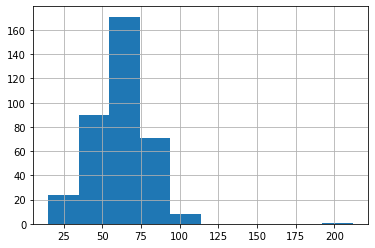

In [32]:
df.Temperature.hist()

In [33]:
# Normally distributed 

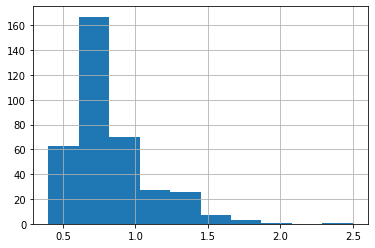

In [34]:
df.Rainfall.hist()

In [35]:
# Right skewed 

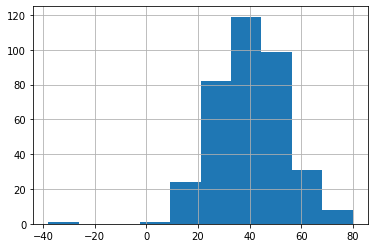

In [36]:
df.Flyers.hist()

In [37]:
# Sort of left skewed, but could be considered normally distributed

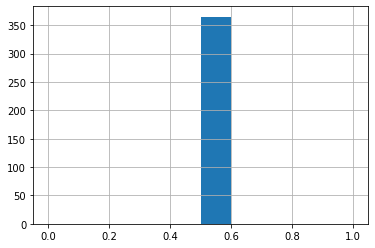

In [38]:
df.Price.hist()

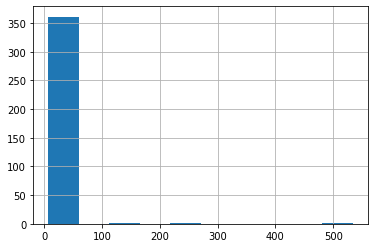

In [39]:
df.Sales.hist()

In [40]:
x = df.Temperature

zscores = (x - x.mean()) / x.std()

empirical_df = pd.DataFrame()

empirical_df["x"] = x

empirical_df["zscore"] = abs(zscores)

empirical_df[zscores >= 2]

,x,zscore
41,212.0,8.336627
166,99.3,2.105251
176,102.6,2.287714
181,102.9,2.304301
190,98.0,2.033372
198,99.3,2.105251
202,99.6,2.121838
207,97.9,2.027843


The high temp of 212 does not make sense. Definite device error. 

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [41]:
empirical_df[zscores >= 3]

,x,zscore
41,212.0,8.336627


Again, will need to remove 212.